<a href="https://colab.research.google.com/github/Sneha213-tech/data_portfolio/blob/main/Emotion_Detection_and_Mental_Health_Analysis_Using_Machine_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import string
import spacy
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import seaborn as sns
%matplotlib inline
import re
from sklearn.naive_bayes import BernoulliNB
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import joblib
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb

In [ ]:
from multiprocessing import Pool, cpu_count
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras import Model
# Download necessary NLTK data files
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("suchintikasarkar/sentiment-analysis-for-mental-health")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sentiment-analysis-for-mental-health


In [ ]:
df = pd.read_csv("/kaggle/input/sentiment-analysis-for-mental-health/Combined Data.csv")


In [ ]:
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
statement,362
status,0


In [ ]:
df.shape

(53043, 3)

In [ ]:
df.columns

Index(['Unnamed: 0', 'statement', 'status'], dtype='object')

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.count()

,0
Unnamed: 0,53043
statement,52681
status,53043


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [ ]:
df.describe()

,Unnamed: 0
count,53043.000000
mean,26521.000000
std,15312.339501
min,0.000000
25%,13260.500000
50%,26521.000000
75%,39781.500000
max,53042.000000


In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df.reset_index(drop=True, inplace=True)

<ipython-input-16-15442007d94c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='status', order=df['status'].value_counts().index, palette='viridis')


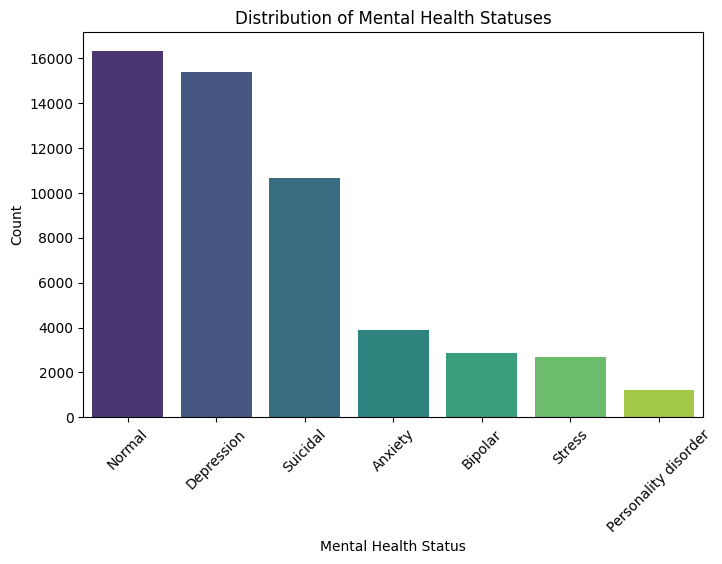

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='status', order=df['status'].value_counts().index, palette='viridis')
plt.title("Distribution of Mental Health Statuses")
plt.xlabel("Mental Health Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

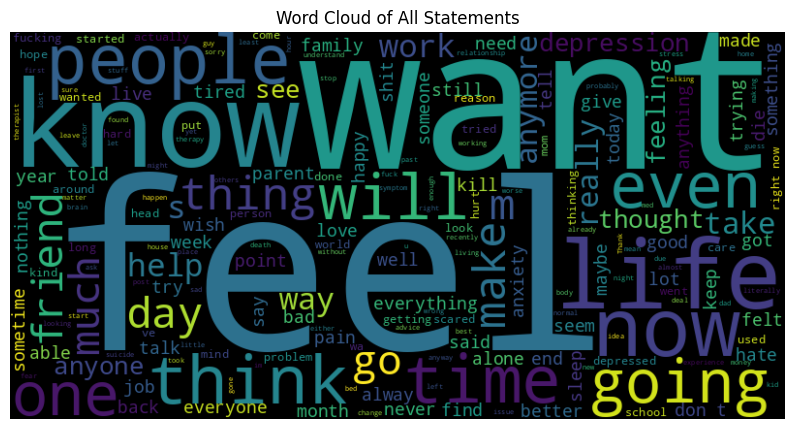

In [ ]:
# 2. Word Cloud for the Most Frequent Words in Statements
from wordcloud import WordCloud
all_text = " ".join(statement for statement in df['statement'].astype(str))

plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="viridis").generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud of All Statements")
plt.axis("off")
plt.show()


In [ ]:
df['text_length'] = df['statement'].astype(str).apply(len)

<ipython-input-19-5e2c40e10ef2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='status', y='text_length', palette='viridis')


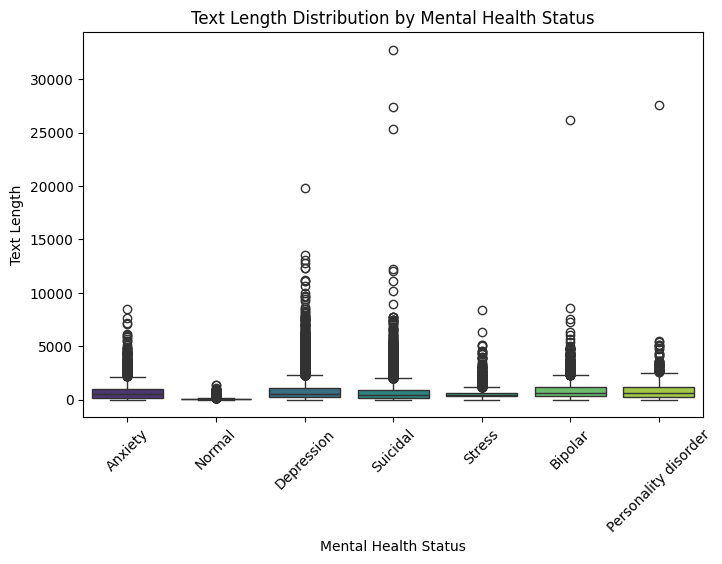

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='status', y='text_length', palette='viridis')
plt.title("Text Length Distribution by Mental Health Status")
plt.xlabel("Mental Health Status")
plt.ylabel("Text Length")
plt.xticks(rotation=45)
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-20-1b0a79ab5342>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='viridis')


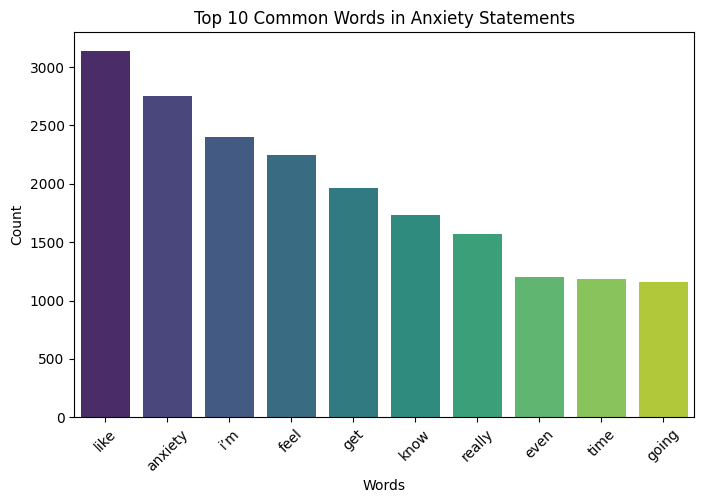

<ipython-input-20-1b0a79ab5342>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='viridis')


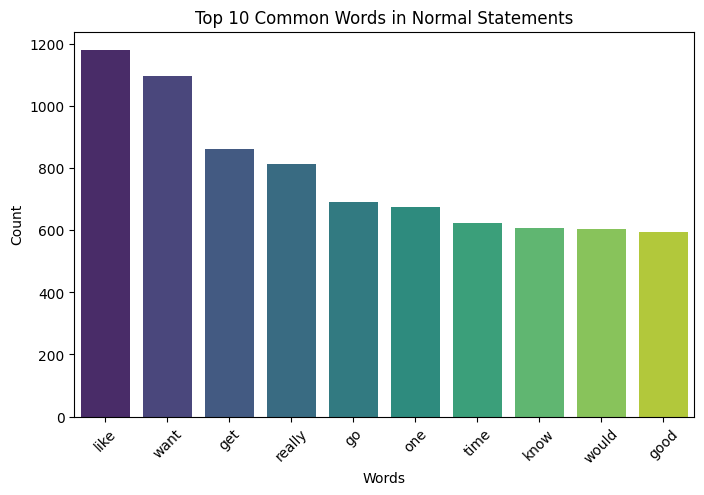

<ipython-input-20-1b0a79ab5342>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='viridis')


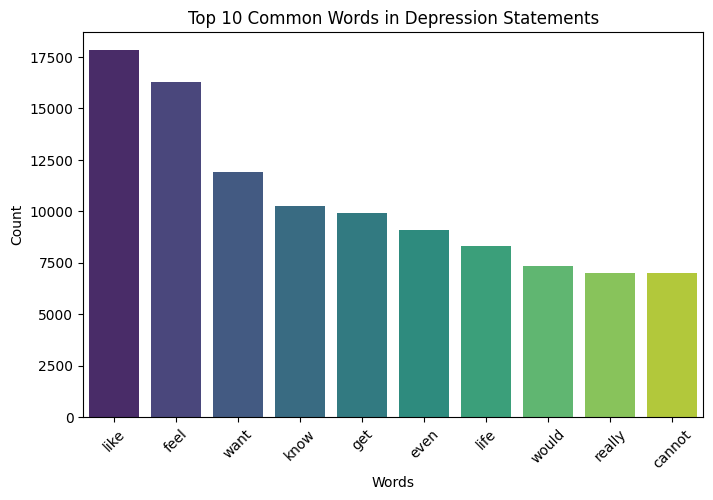

<ipython-input-20-1b0a79ab5342>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='viridis')


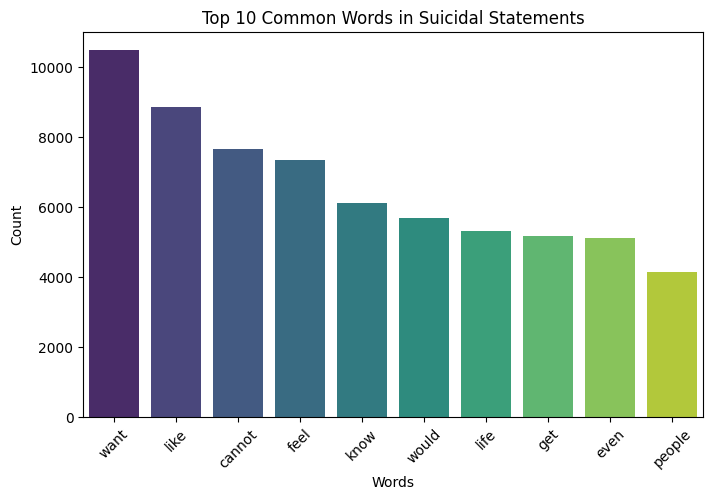

<ipython-input-20-1b0a79ab5342>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='viridis')


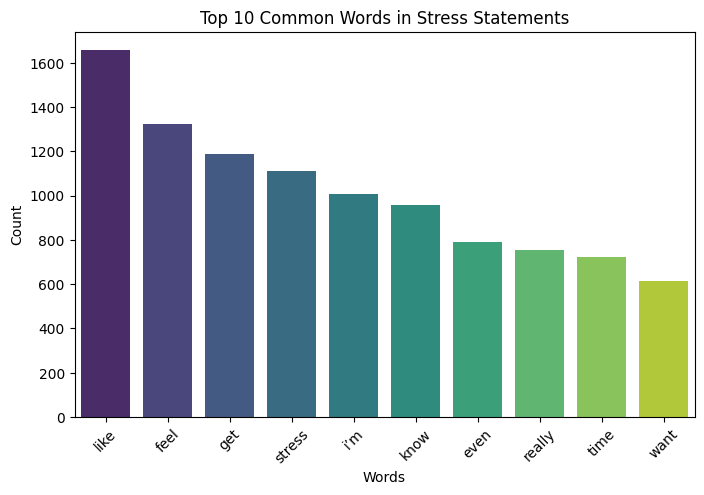

<ipython-input-20-1b0a79ab5342>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='viridis')


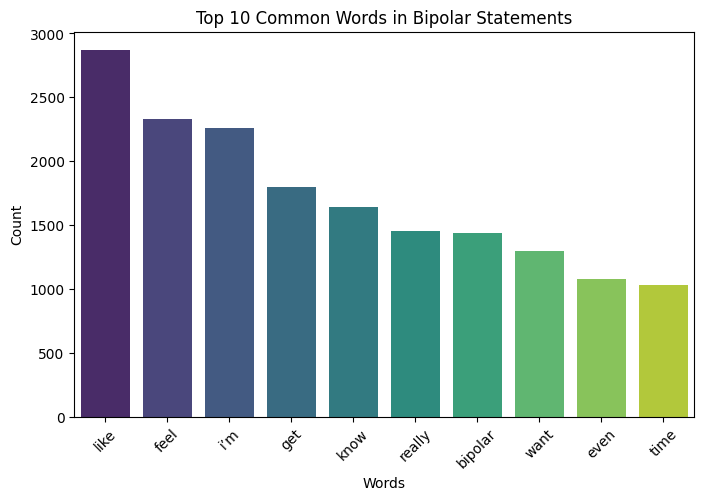

<ipython-input-20-1b0a79ab5342>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='viridis')


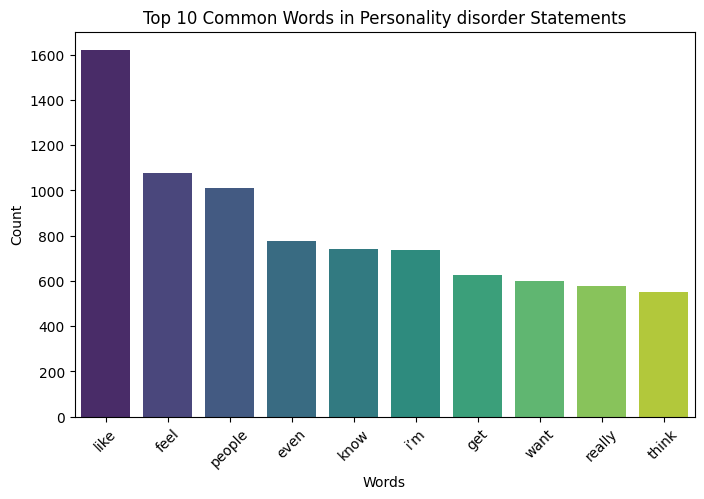

In [ ]:
from collections import Counter
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def most_common_words(text):
    words = text.lower().split()
    words = [word for word in words if word not in stopwords.words('english')]
    word_counts = Counter(words)
    return word_counts.most_common(10)

for status in df['status'].unique():
    status_text = " ".join(df[df['status'] == status]['statement'].astype(str))
    common_words = most_common_words(status_text)
    words, counts = zip(*common_words)

    plt.figure(figsize=(8, 5))
    sns.barplot(x=list(words), y=list(counts), palette='viridis')
    plt.title(f"Top 10 Common Words in {status} Statements")
    plt.xlabel("Words")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

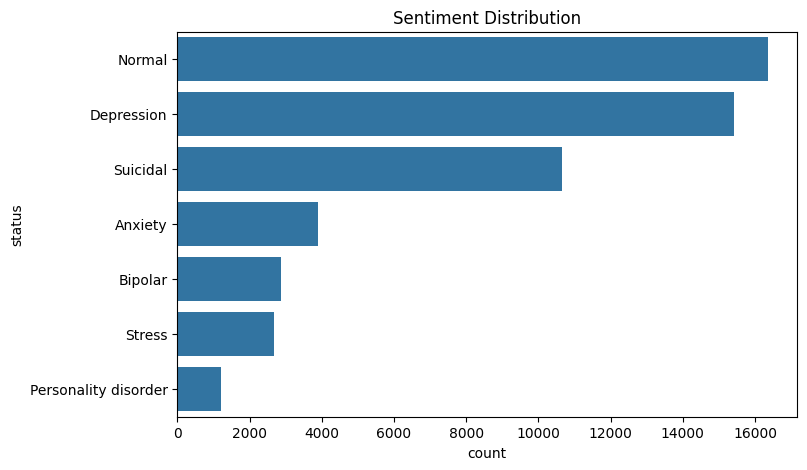

In [ ]:
plt.figure(figsize=(8,5)) #to adjust figure size
sns.countplot(y=df["status"], order=df["status"].value_counts().index) #Counter plot, y axis as sentiments with descending order
plt.title("Sentiment Distribution")
plt.show()


In [ ]:
df = df.dropna(subset=['statement'])


In [ ]:
df

,statement,status,text_length
0,oh my gosh,Anxiety,10
1,"trouble sleeping, confused mind, restless hear...",Anxiety,64
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,78
3,I've shifted my focus to something else but I'...,Anxiety,61
4,"I'm restless and restless, it's been a month n...",Anxiety,72
...,...,...,...
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety,1766
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety,1012
53040,Is there any way to sleep better? I can't slee...,Anxiety,85
53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety,401


In [ ]:
print("Missing values before dropping:", df['statement'].isnull().sum())

Missing values before dropping: 0


In [ ]:
import re
import string

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)  # Remove punctuation
    text = re.sub(r'\n', '', text)  # Remove new lines
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
    return text

df['statement'] = df['statement'].astype(str).apply(clean_text)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['status'] = label_encoder.fit_transform(df['status'])


In [ ]:
X = df['statement']
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
y_pred_train = model.predict(X_train_tfidf)
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

Training Accuracy: 0.7098044798785118
              precision    recall  f1-score   support

           0       0.81      0.64      0.72      3086
           1       0.90      0.51      0.65      2250
           2       0.57      0.83      0.67     12388
           3       0.84      0.84      0.84     13035
           4       0.96      0.11      0.20       840
           5       0.91      0.16      0.27      2051
           6       0.75      0.61      0.67      8494

    accuracy                           0.71     42144
   macro avg       0.82      0.53      0.57     42144
weighted avg       0.75      0.71      0.70     42144



In [ ]:
y_pred = model.predict(X_test_tfidf)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test Accuracy: 0.6655594571509917
              precision    recall  f1-score   support

           0       0.80      0.62      0.70       755
           1       0.86      0.46      0.60       527
           2       0.51      0.80      0.62      3016
           3       0.83      0.80      0.81      3308
           4       0.94      0.07      0.13       237
           5       0.84      0.13      0.22       536
           6       0.70      0.54      0.61      2158

    accuracy                           0.67     10537
   macro avg       0.78      0.49      0.53     10537
weighted avg       0.71      0.67      0.65     10537



Training Accuracy: 0.7098044798785118
              precision    recall  f1-score   support

           0       0.81      0.64      0.72      3086
           1       0.90      0.51      0.65      2250
           2       0.57      0.83      0.67     12388
           3       0.84      0.84      0.84     13035
           4       0.96      0.11      0.20       840
           5       0.91      0.16      0.27      2051
           6       0.75      0.61      0.67      8494

    accuracy                           0.71     42144
   macro avg       0.82      0.53      0.57     42144
weighted avg       0.75      0.71      0.70     42144



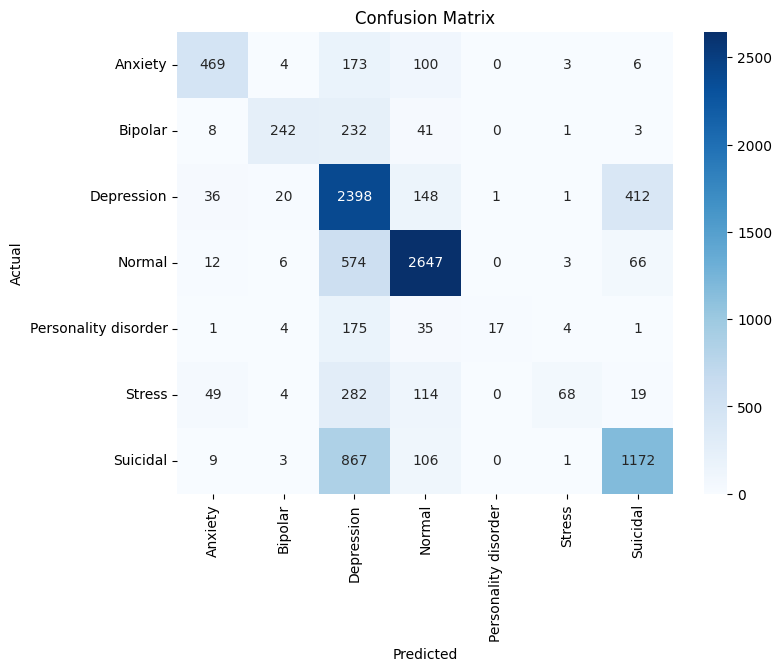

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Import confusion_matrix
y_pred_train = model.predict(X_train_tfidf)
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
import pickle

pickle.dump(model, open("mental_health_model.pkl", "wb"))
pickle.dump(tfidf, open("tfidf_vectorizer.pkl", "wb"))

In [ ]:
loaded_model = pickle.load(open("mental_health_model.pkl", "rb"))
loaded_tfidf = pickle.load(open("tfidf_vectorizer.pkl", "rb"))

sample_text = ["I feel hopeless and sad"]
sample_tfidf = loaded_tfidf.transform(sample_text)
prediction = loaded_model.predict(sample_tfidf)
print("Predicted Status:", label_encoder.inverse_transform(prediction))

Predicted Status: ['Depression']


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 0.5, 1.0]}
grid = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_tfidf, y_train)
print("Best Parameters:", grid.best_params_)

Best Parameters: {'alpha': 0.1}


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train_tfidf, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Average CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.66555938 0.66211888 0.66876261 0.67006762 0.66741813]
Average CV Accuracy: 0.6667853225324485
